# 신경망 학습 최적화

SGD 뿐만 아니라, 모든 Gradient Descent는 진동하며 극소점을 찾아나간다.  

Momentum:  
가중치 업데이트 과정에서 이전 업데이트의 방향성을 고려하여 최종 업데이트하는 것을 Momentum이라고 한다.  
(Gradient 업데이트 이후 이전 스텝 방향으로 추가적으로 이동하여 업데이트를 마친다.)  
이는 수렴을 더욱 빠르게 하는 데 도움이 된다.  

Nesterov Momentum:  
이전 step 방향으로 이동 후 Gradient를 계산하여 업데이트 한다.  
이전 스텝의 방향성을 더 잘 반영할 수 있다.  

To Prevent Overfitting. Regularization:  
- penalty in cost function like Ridge and Lasso in regression.
- Dropout: 훈련 시 매 반복(batch)에서 랜덤하게 몇 node를 제하고 실행한다. (테스트에서는 정상적으로 모든 node를 활성화.)
- Early Stopping: 훈련 중 Validation set을 이용하여 가상의 test를 진행한다. 결과가 향상되지 않았다면 학습을 중단한다. 보통 매 epoch(batch의 반복으로 결국 모든 데이터가 사용된 상태)마다 손실함수를 계산하고, 전 epoch보다 커진 경우 중단한다.
- SGD, Mini-batch GD

AdaGrad:  
각 weight의 학습률을 별개로 조정하며 학습한다.  
학습이 진행될수록 학습률은 떨어진다. 즉, 처음엔 큰 보폭으로, 후반에는 작은 보폭으로 학습한다.  

RMSprop:  
AdaGradm의 업그레이드 버전으로, 학습률이 너무 빠르게 감소하는 것을 보정한다.  

ADAM: RMSprop + Momentum  

Learning Rate Scheduler (LR Scheduler)는 딥러닝 모델의 학습 중에 사용되는 기술로, 학습률(learning rate)을 동적으로 조절하는 방법을 말합니다. 학습률은 각 학습 단계(에포크)에서 모델이 가중치를 업데이트할 때 사용되는 스케일링된 값으로, 네트워크가 수렴하고 학습이 안정화되도록 하는데 중요한 역할을 합니다.

일반적으로 LR Scheduler는 학습이 진행됨에 따라 학습률을 점진적으로 감소시키는 방식을 채택합니다. 이는 초기에는 큰 학습률을 사용하여 빠르게 수렴하도록 하고, 학습이 진행됨에 따라 세밀한 조정을 하여 최적값에 수렴할 수 있도록 합니다. 일반적으로 학습률을 감소시키는 방법으로는 다음과 같은 것들이 있습니다:

1. **Step Decay**: 일정한 에포크 간격 또는 특정 조건을 만족할 때마다 학습률을 감소시킵니다. 예를 들어, 매 10번의 에포크마다 학습률을 절반으로 줄일 수 있습니다.

2. **Exponential Decay**: 학습률을 지수 함수로 줄여나갑니다. 일정한 비율로 감소하여 지수 함수의 형태를 띄게 됩니다.

3. **Time-based Learning Rate Scheduler**: 학습률을 시간이 지남에 따라 점진적으로 감소시키는 방법 중 하나입니다. 이 방법은 주로 전체 학습 시간에 따라 학습률을 조절하는 것으로, 시간이 지남에 따라 학습률을 줄여나가는데 사용됩니다.


이러한 LR Scheduler를 통해 모델의 학습 속도와 안정성을 향상시킬 수 있습니다. 선택한 LR Scheduler는 데이터셋, 모델 아키텍처, 학습 목표 등에 따라 다르며, 실험을 통해 최적의 Scheduler를 찾는 것이 일반적입니다.

데이터 셔플링(Data Shuffling)은 머신 러닝 및 딥러닝에서 사용되는 중요한 전처리 기술 중 하나입니다. 데이터 셔플링은 데이터셋 내의 샘플들의 순서를 무작위로 섞는 것을 의미합니다. 이 과정은 주로 다음과 같은 목적으로 사용됩니다.  

일반적으로 데이터 셔플링은 각 에포크(epoch) 혹은 학습 과정의 시작 시에 수행됩니다. 이는 매번 모델에 같은 데이터가 제공되지 않고, 다양한 데이터 조각이 사용되어 학습이 더 효과적으로 이루어질 수 있도록 돕습니다. 데이터 셔플링은 데이터를 섞어주는 함수를 사용하여 간단히 구현할 수 있으며, 대부분의 딥러닝 프레임워크에서는 자체적인 셔플링 기능을 제공합니다.

---

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('figure', figsize=(10, 6))

from matplotlib import rcParams
rcParams['font.family'] = 'Gulim'
rcParams['font.size'] = 10
rcParams['axes.unicode_minus'] = False

# 1 매개변수 갱신 - Optimizer

### 1.1 확률적 경사 하강법 - SGD

<img src="./images/e_6.1.png" width="180"/>

In [ ]:
# SGD 클래스 구현
class SGD:
    """확률적 경사 하강법（Stochastic Gradient Descent）"""
    def __init__(self, lr=0.01):
        self.lr = lr

    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

### 1.2 SGD의 단점

- 함수 정의
<img src="./images/e_6.2.png" width="200"/>

- 그래프와 등고선
<img src="./images/fig_6-1.png" width="500"/>

- 함수의 기울기
<img src="./images/fig_6-2.png" width="400"/>

- SGD에 의한 최적화 갱신 경로: 초기값 (-7.0, 2.0)
<img src="./images/fig_6-3.png" width="400"/>

### 1.3 모멘텀 - Momentum

<img src="./images/e_6.3.png" width="180"/>
<img src="./images/e_6.4.png" width="150"/>

- 모멘텀의 이미지
<img src="./images/fig_6-4.png" width="500"/>

In [ ]:
# 모멘텀 클래스 구현
class Momentum:
    """모멘텀 SGD"""
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None

    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)

        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key]
            params[key] += self.v[key]

- 모멘텀에 의한 최적화 갱신 경로: 초기값 (-7.0, 2.0)
<img src="./images/fig_6-5.png" width="400"/>

### 1.4 AdaGrad

<img src="./images/e_6.5.png" width="180"/>
<img src="./images/e_6.6.png" width="180"/>

In [ ]:
# AdaGrad 클래스 구현
class AdaGrad:
    """AdaGrad"""
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None

    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)

        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

- AdaGrad에 의한 최적화 갱신 경로: 초기값 (-7.0, 2.0)
<img src="./images/fig_6-6.png" width="400"/>

### 1.5 Adam

In [ ]:
class Adam:
    """Adam (http://arxiv.org/abs/1412.6980v8)"""
    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None

    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)

        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)

        for key in params.keys():
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])

            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)


- Adam에 의한 최적화 갱신 경로: 초기값 (-7.0, 2.0)
<img src="./images/fig_6-7.png" width="400"/>

### 1.6 Optimizer 비교

#### 1.6.1 다변수 함수

- 함수
<img src="./images/e_6.2.png" width="200"/>

<img src="./images/fig_6-8.png" width="500"/>

- 코드 구현

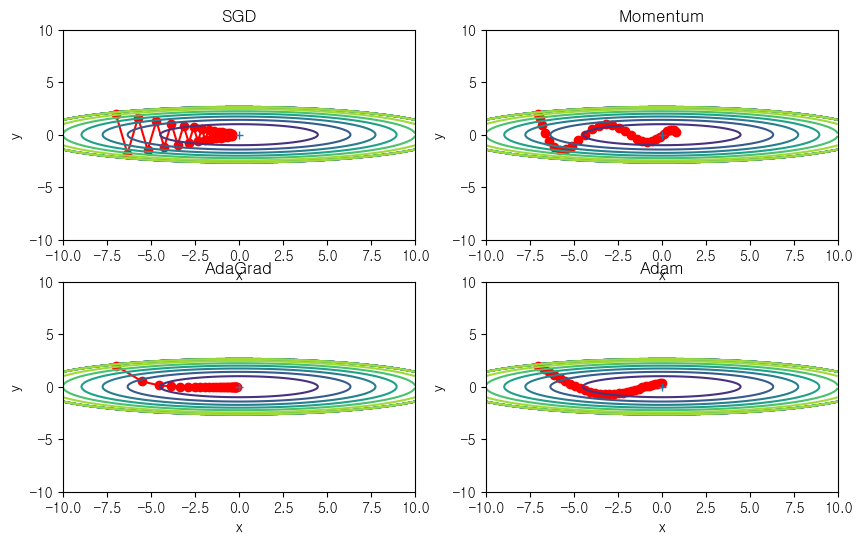

In [ ]:
from collections import OrderedDict
from common.optimizer import *

# 함수 정의
def f(x, y):
    return x**2 / 20.0 + y**2

# 도함수 정의
def df(x, y):
    return x / 10.0, 2.0*y

# 초기값
init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0

optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]

    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])

        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)


    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)

    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)

    # 외곽선 단순화
    mask = Z > 7
    Z[mask] = 0

    # 그래프 그리기
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")

plt.show()

#### 1.6.2  MNIST 데이터셋

- MNIST 데이터셋 학습 진행 과정
<img src="./images/fig_6-9.png" width="500"/>

- MNIST 학습 진행 과정 코드 구현

In [ ]:
%%time
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *

# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []

# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)

        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)

    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))

===========iteration:0===========
SGD:2.3634953361503026
Momentum:2.4443567970164057
AdaGrad:2.3881691381839882
Adam:2.23549502027258
===========iteration:100===========
SGD:1.634284449397427
Momentum:0.34866283245160357
AdaGrad:0.10941816385151898
Adam:0.209908590548838
===========iteration:200===========
SGD:0.8338750128602296
Momentum:0.2711786376937777
AdaGrad:0.09436442098329806
Adam:0.1696806009619663
===========iteration:300===========
SGD:0.6074959524252865
Momentum:0.267724696736098
AdaGrad:0.11892754864807474
Adam:0.20864398453491814
===========iteration:400===========
SGD:0.42121429820552625
Momentum:0.12587553694520065
AdaGrad:0.05982845570662416
Adam:0.06406286291045661
===========iteration:500===========
SGD:0.4899997386824568
Momentum:0.21508613412374802
AdaGrad:0.08808095440357067
Adam:0.13614645023262906
===========iteration:600===========
SGD:0.2507486117094249
Momentum:0.09279081419394297
AdaGrad:0.05971081829289307
Adam:0.06226150493760036
===========iteration:700==

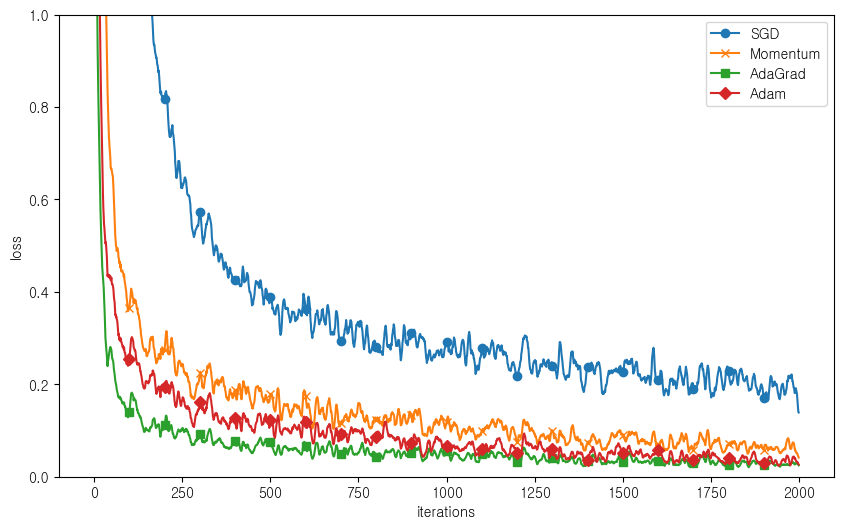

In [ ]:
# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

# 2 가중치 초기값
- sigmoid, tanh: Xavier 초기값
- ReLU:  He 초기값

### 2.1 은닉층의 활성화값 분포


In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
def ReLU(x):
    return np.maximum(0, x)

In [ ]:
def tanh(x):
    return np.tanh(x)

In [ ]:
def plot_activation( w_init_case = 1, act_func = sigmoid):
    input_data = np.random.randn(1000, 100)  # 1000개의 데이터
    node_num = 100                           # 각 은닉층의 노드(뉴런) 수
    hidden_layer_size = 5                    # 은닉층이 5개
    activations = {}                         # 이곳에 활성화 결과를 저장

    x = input_data

    for i in range(hidden_layer_size):
        if i != 0:
            x = activations[i-1]

        # 초깃값을 다양하게 바꿔가며 실험해보자！
        if w_init_case   == 1:
            w = np.random.randn(node_num, node_num) * 1
        elif w_init_case == 2:
            w = np.random.randn(node_num, node_num) * 0.01
        elif w_init_case == 3:
            w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
        elif w_init_case == 4:
            w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)
        else:
            w = np.random.randn(node_num, node_num) * 1

        a = np.dot(x, w)

        # 활성화 함수도 바꿔가며 실험해보자！
        z = act_func(a)
        # z = sigmoid(a)
        # z = ReLU(a)
        # z = tanh(a)

        activations[i] = z

    # 히스토그램 그리기
    for i, a in activations.items():
        plt.subplot(1, len(activations), i+1)
        plt.title(str(i+1) + '-layer')
        if i != 0: plt.yticks([], [])
        plt.hist(a.flatten(), 30, range=(0,1))

    plt.show()

#### 2.1.1 가중치를 표준편차가 1인 정규분포로 초기화

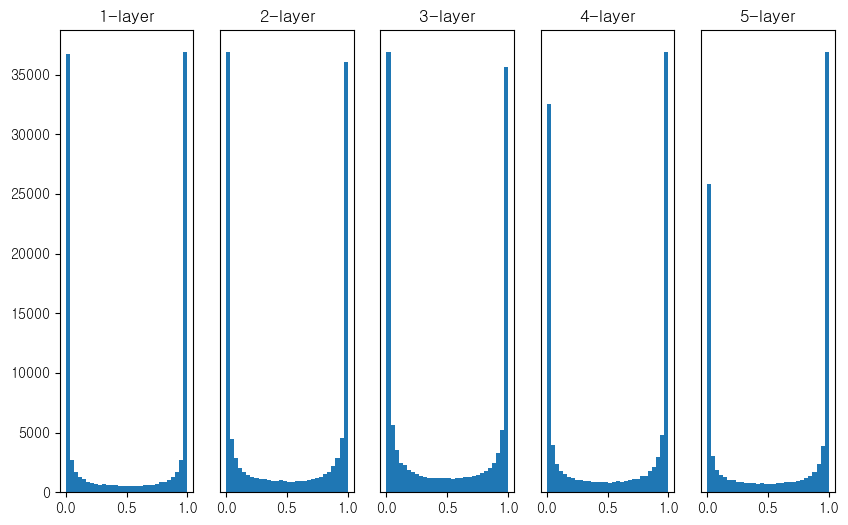

In [ ]:
# w: 표준편차 1인 정규분포로 초기화, sigmoid 사용
plot_activation(w_init_case=1, act_func=sigmoid)

#### 2.1.2 가중치를 표준편차가 0.01인 정규분포로 초기화

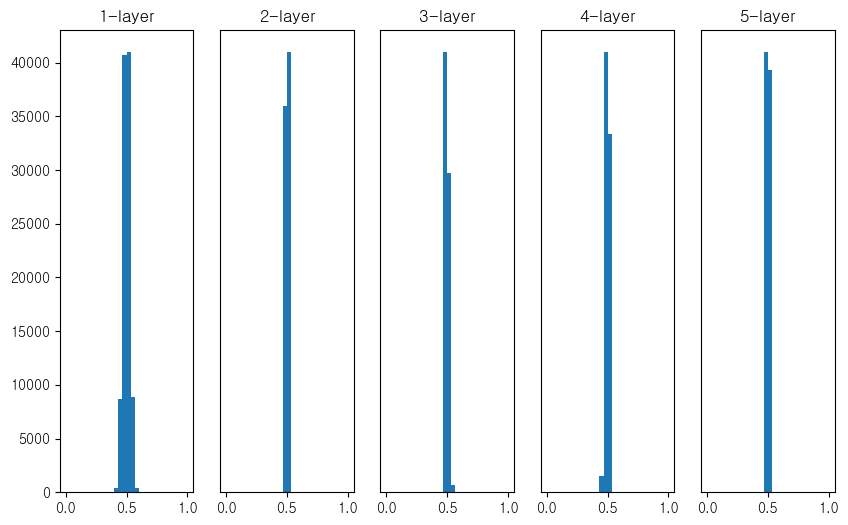

In [ ]:
# w: 표준편차 0.01인 정규분포로 초기화, sigmoid 사용
plot_activation(w_init_case=2, act_func=sigmoid)

#### 2.1.3 Xavier 초기값
- 사비에르 글로로트(Xavier Glorot), 요슈아 벤지오(Yoshua Bengio)

<img src="./images/fig_6-12.png" width="400"/>

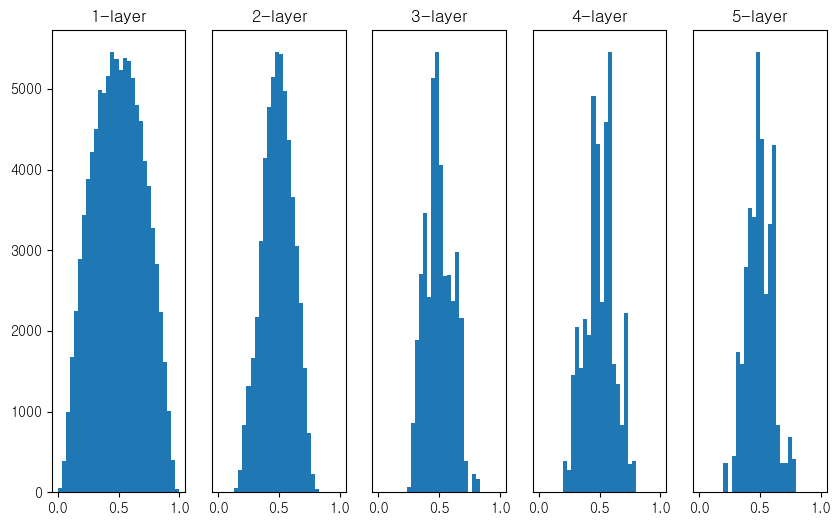

In [ ]:
# w: Xavier 초기화, sigmoid 사용
plot_activation(w_init_case=3, act_func=sigmoid)

#### 2.1.4 He 초기값
- 카이밍 히(Kaîming He)
- ReLU 사용시 최적화

- w: 표준편차가 $\sqrt{\frac{2}{n}}$ 인 정규 분포로 초기화

#### ReLU 사용시 가중치 초기화

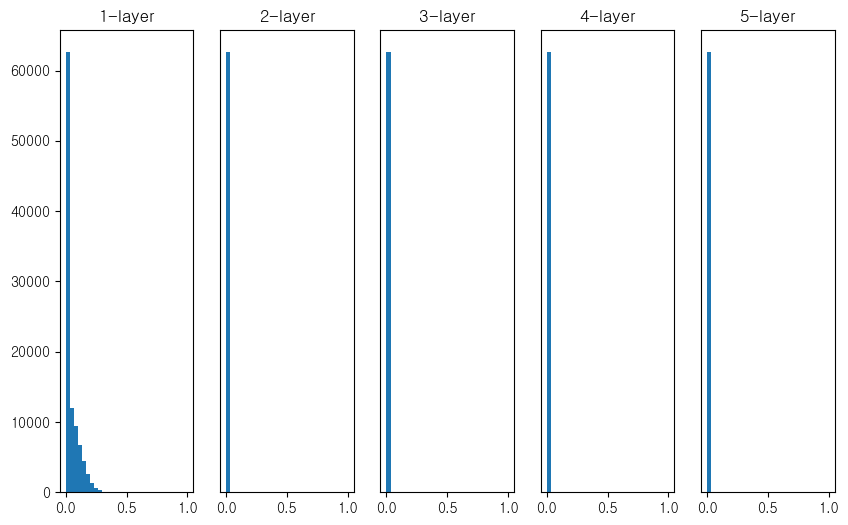

In [ ]:
# w: 표준편차 0.01인 정규분포로 초기화, ReLU 사용
plot_activation(w_init_case=2, act_func=ReLU)

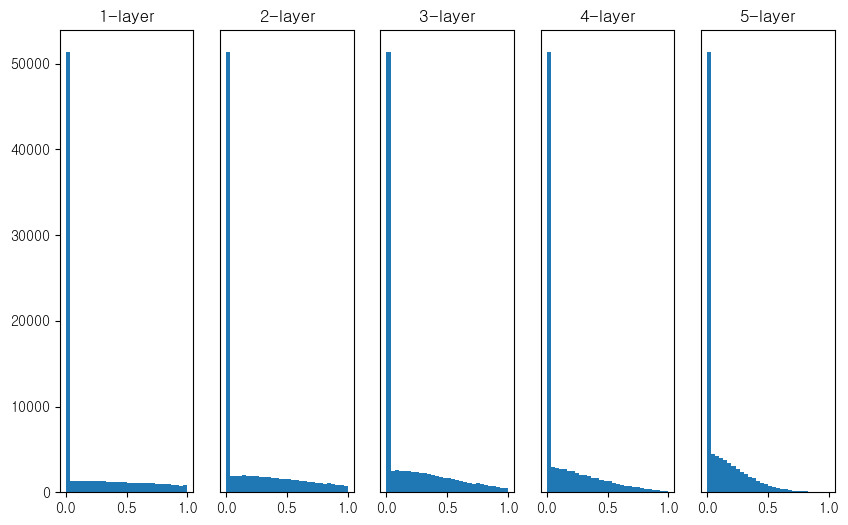

In [ ]:
# w: Xavier 초기화, ReLU 사용
plot_activation(w_init_case=3, act_func=ReLU)

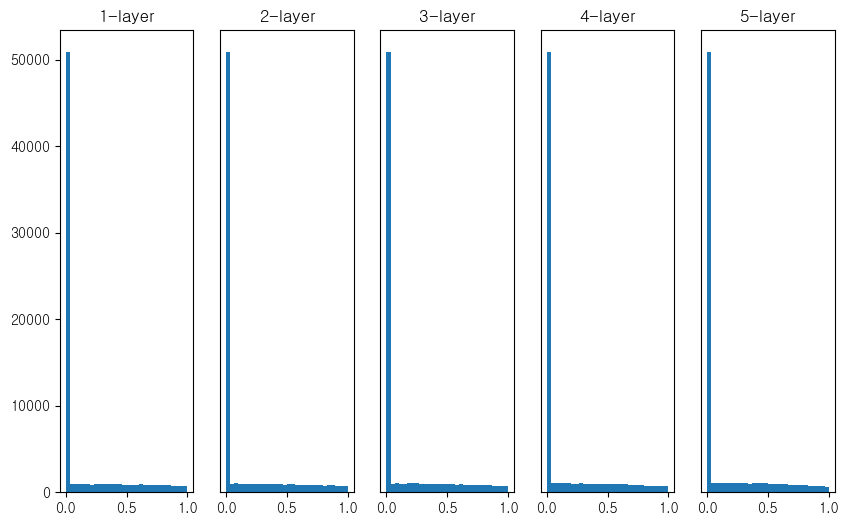

In [ ]:
# w: He 초기화, ReLU 사용
plot_activation(w_init_case=4, act_func=ReLU)

### 2.2 가중치 초기값 비교: MNIST 데이터셋

- MNIST 데이터셋 학습 진행 과정: 기중치 초기값에 따른 비교
<img src="./images/fig_6-15.png" width="500"/>

- MNIST 학습 진행 과정 코드 구현: 기중치 초기값에 따른 비교

In [ ]:
%%time
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

# 1. 실험용 설정==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []

# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)

        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)

    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))

===========iteration:0===========
std=0.01:2.3024874146868375
Xavier:2.316990365712562
He:2.350454657109191
===========iteration:100===========
std=0.01:2.3026793206148257
Xavier:2.2450954888251244
He:1.5877104625283207
===========iteration:200===========
std=0.01:2.303732670571587
Xavier:2.0853357365895455
He:0.8397512866786352
===========iteration:300===========
std=0.01:2.2992572259058233
Xavier:1.640274519975573
He:0.43670894266165494
===========iteration:400===========
std=0.01:2.2994367797128747
Xavier:1.0990826468381965
He:0.4513451967769967
===========iteration:500===========
std=0.01:2.299330691463981
Xavier:0.7412200665473234
He:0.33655802843824584
===========iteration:600===========
std=0.01:2.299881534214517
Xavier:0.5632770464366239
He:0.27640464237340945
===========iteration:700===========
std=0.01:2.2974713479367663
Xavier:0.46897203258285947
He:0.28067306304876516
===========iteration:800===========
std=0.01:2.2988621804497447
Xavier:0.4568193339453033
He:0.342731329228

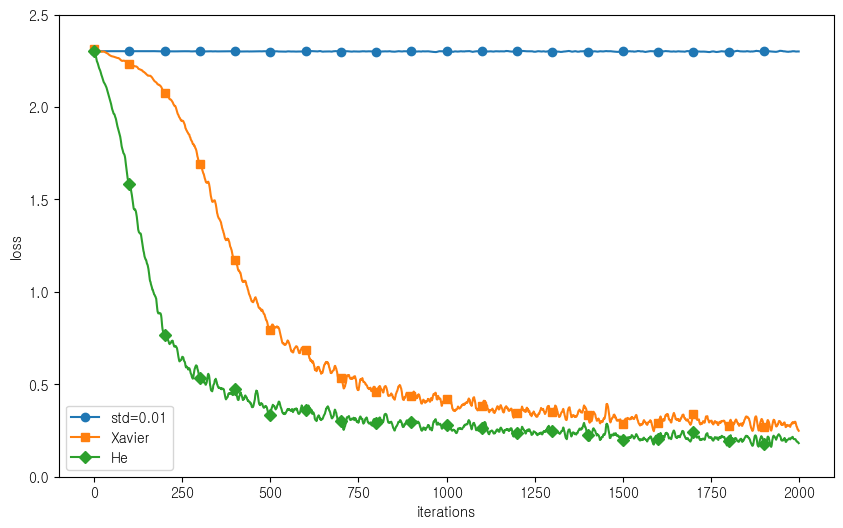

In [ ]:
# 3. 그래프 그리기==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

# 3 배치 정규화 - Batch Normalization

### 3.1 배치 정규화 알고리즘

- 학습 속도 개선
- 초기값 의존도 낮춤
- 오버피팅 억제

- 배치 정규화를 사용한 신경망의 예
<img src="./images/fig_6-16.png" width="600"/>

- 배치 정규화 수식
<img src="./images/e_6.7.png" width="200"/>

- 배치 정규화의 확대(scale), 이동(shift)
- $\gamma = 1, \beta = 0$ 으로 학습 시작, 학습 진행에 따라서 조정
<img src="./images/e_6.8.png" width="150"/>

### 3.2 배치 정규화 효과

- 배치 정규화 효과: 학습 속도 향상
<img src="./images/fig_6-18.png" width="500"/>

- 가중치 초기값에 따른 학습 진행
- 실선: 배치 정규화 사용, 점선: 배치 정규화 상용하지 않음
<img src="./images/fig_6-19.png" width="500"/>

# 4 오버피팅 - Over fitting

### 4.1 오버피팅된 학습 진행 과정

In [ ]:
%%time
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =========================
weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
#weight_decay_lambda = 0.1
# ==========================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

epoch:0, train acc:0.06666666666666667, test acc:0.0632
epoch:1, train acc:0.06666666666666667, test acc:0.0678
epoch:2, train acc:0.07, test acc:0.0728
epoch:3, train acc:0.07, test acc:0.0796
epoch:4, train acc:0.09, test acc:0.0939
epoch:5, train acc:0.12333333333333334, test acc:0.1131
epoch:6, train acc:0.15666666666666668, test acc:0.1315
epoch:7, train acc:0.18333333333333332, test acc:0.1534
epoch:8, train acc:0.24333333333333335, test acc:0.1843
epoch:9, train acc:0.26, test acc:0.2099
epoch:10, train acc:0.2833333333333333, test acc:0.2287
epoch:11, train acc:0.31666666666666665, test acc:0.2522
epoch:12, train acc:0.33, test acc:0.2767
epoch:13, train acc:0.37666666666666665, test acc:0.2955
epoch:14, train acc:0.4033333333333333, test acc:0.3193
epoch:15, train acc:0.43666666666666665, test acc:0.3351
epoch:16, train acc:0.43333333333333335, test acc:0.3501
epoch:17, train acc:0.43666666666666665, test acc:0.3595
epoch:18, train acc:0.47333333333333333, test acc:0.3711
epoc

epoch:167, train acc:1.0, test acc:0.7577
epoch:168, train acc:1.0, test acc:0.7571
epoch:169, train acc:1.0, test acc:0.7558
epoch:170, train acc:1.0, test acc:0.7534
epoch:171, train acc:1.0, test acc:0.7565
epoch:172, train acc:1.0, test acc:0.7573
epoch:173, train acc:1.0, test acc:0.7578
epoch:174, train acc:1.0, test acc:0.7551
epoch:175, train acc:1.0, test acc:0.7589
epoch:176, train acc:1.0, test acc:0.7596
epoch:177, train acc:1.0, test acc:0.7571
epoch:178, train acc:1.0, test acc:0.7577
epoch:179, train acc:1.0, test acc:0.7583
epoch:180, train acc:1.0, test acc:0.7583
epoch:181, train acc:1.0, test acc:0.7582
epoch:182, train acc:1.0, test acc:0.7599
epoch:183, train acc:1.0, test acc:0.7604
epoch:184, train acc:1.0, test acc:0.7574
epoch:185, train acc:1.0, test acc:0.7595
epoch:186, train acc:1.0, test acc:0.7605
epoch:187, train acc:1.0, test acc:0.7594
epoch:188, train acc:1.0, test acc:0.7592
epoch:189, train acc:1.0, test acc:0.7598
epoch:190, train acc:1.0, test acc

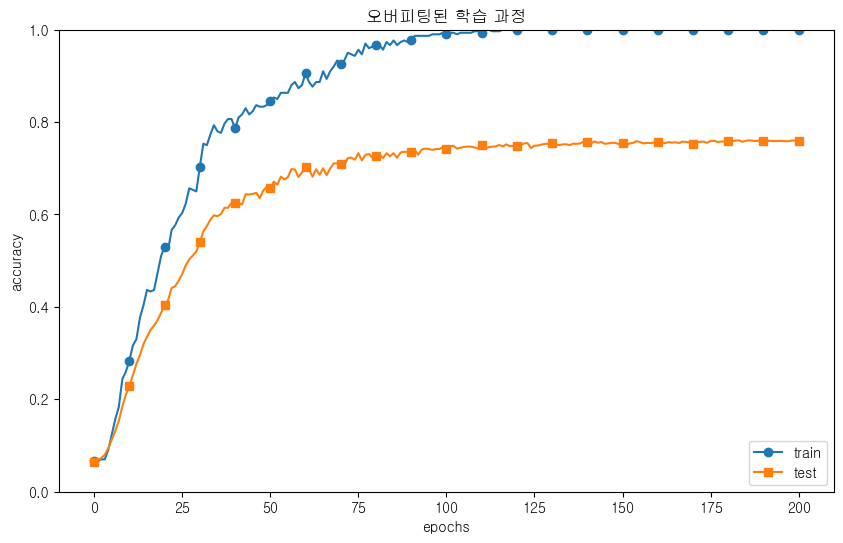

In [ ]:
# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.title('오버피팅된 학습 과정')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### 4.2 가중치 감소 - L2 규제

In [ ]:
%%time
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =========================
#weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
weight_decay_lambda = 0.1
# ==========================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

epoch:0, train acc:0.19, test acc:0.1538
epoch:1, train acc:0.20333333333333334, test acc:0.1676
epoch:2, train acc:0.20333333333333334, test acc:0.1775
epoch:3, train acc:0.21666666666666667, test acc:0.1881
epoch:4, train acc:0.22333333333333333, test acc:0.1991
epoch:5, train acc:0.23333333333333334, test acc:0.2092
epoch:6, train acc:0.25666666666666665, test acc:0.2265
epoch:7, train acc:0.27, test acc:0.236
epoch:8, train acc:0.30333333333333334, test acc:0.249
epoch:9, train acc:0.31333333333333335, test acc:0.257
epoch:10, train acc:0.33, test acc:0.2619
epoch:11, train acc:0.3333333333333333, test acc:0.2698
epoch:12, train acc:0.38666666666666666, test acc:0.2911
epoch:13, train acc:0.43, test acc:0.3147
epoch:14, train acc:0.4533333333333333, test acc:0.3358
epoch:15, train acc:0.48, test acc:0.3559
epoch:16, train acc:0.5133333333333333, test acc:0.3757
epoch:17, train acc:0.5366666666666666, test acc:0.3943
epoch:18, train acc:0.5633333333333334, test acc:0.4151
epoch:19, 

epoch:162, train acc:0.9433333333333334, test acc:0.7483
epoch:163, train acc:0.9333333333333333, test acc:0.7589
epoch:164, train acc:0.95, test acc:0.7477
epoch:165, train acc:0.9433333333333334, test acc:0.7619
epoch:166, train acc:0.94, test acc:0.7501
epoch:167, train acc:0.95, test acc:0.7479
epoch:168, train acc:0.9366666666666666, test acc:0.7601
epoch:169, train acc:0.9433333333333334, test acc:0.7612
epoch:170, train acc:0.9533333333333334, test acc:0.7556
epoch:171, train acc:0.9366666666666666, test acc:0.7598
epoch:172, train acc:0.95, test acc:0.7583
epoch:173, train acc:0.9333333333333333, test acc:0.757
epoch:174, train acc:0.9333333333333333, test acc:0.7525
epoch:175, train acc:0.9333333333333333, test acc:0.7601
epoch:176, train acc:0.9466666666666667, test acc:0.759
epoch:177, train acc:0.9533333333333334, test acc:0.7581
epoch:178, train acc:0.9533333333333334, test acc:0.7567
epoch:179, train acc:0.9566666666666667, test acc:0.7621
epoch:180, train acc:0.95, test 

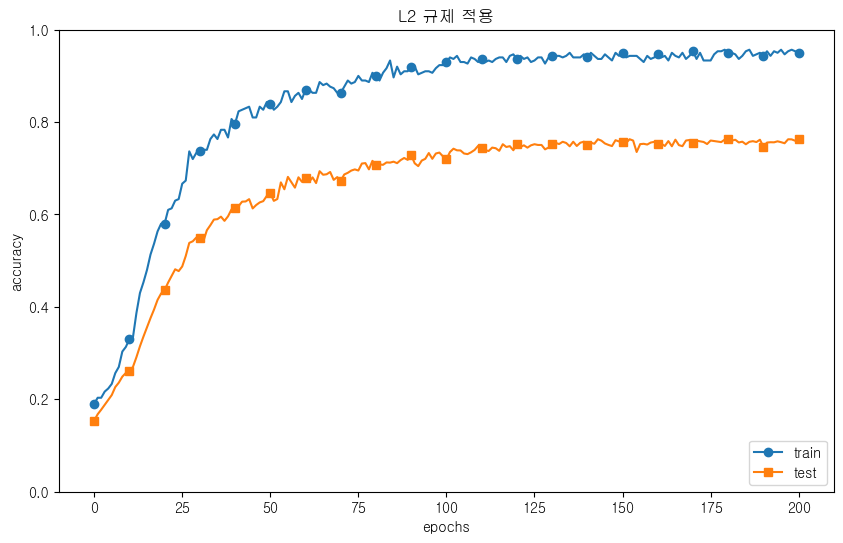

In [ ]:
# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.title('L2 규제 적용')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### 4.3 드롭아웃 - Dropout

- 뉴런을 무작위로 삭제하여 신호 전달을 차단
<img src="./images/fig_6-22.png" width="500"/>

#### 드롭아웃을 적용한 신경망 학습 과정

In [ ]:
%%time
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비울 설정 ========================
use_dropout = True  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2
dropout_ratio = 0.15
# =======================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

train loss:2.2880079073966124
=== epoch:1, train acc:0.13666666666666666, test acc:0.1265 ===
train loss:2.312179088454263
train loss:2.2673800070131507
train loss:2.2960004666506806
=== epoch:2, train acc:0.14333333333333334, test acc:0.1302 ===
train loss:2.292396590899515
train loss:2.2779205151735438
train loss:2.28276020631193
=== epoch:3, train acc:0.14333333333333334, test acc:0.1311 ===
train loss:2.301727828873898
train loss:2.2934467993048155
train loss:2.29960086897131
=== epoch:4, train acc:0.14333333333333334, test acc:0.1334 ===
train loss:2.302906032044357
train loss:2.285400717151498
train loss:2.2897025131234705
=== epoch:5, train acc:0.15, test acc:0.1364 ===
train loss:2.286375419348248
train loss:2.2981868703602455
train loss:2.2975130976119997
=== epoch:6, train acc:0.15666666666666668, test acc:0.1398 ===
train loss:2.2849932958059
train loss:2.286759743399814
train loss:2.2883229498196895
=== epoch:7, train acc:0.15666666666666668, test acc:0.1432 ===
train loss:

=== epoch:56, train acc:0.42333333333333334, test acc:0.3491 ===
train loss:2.169408196397673
train loss:2.155586019762234
train loss:2.16452144988129
=== epoch:57, train acc:0.43666666666666665, test acc:0.3508 ===
train loss:2.1702212504458593
train loss:2.157047545984477
train loss:2.157628102519915
=== epoch:58, train acc:0.4266666666666667, test acc:0.3503 ===
train loss:2.1582170388418014
train loss:2.1841451185805876
train loss:2.176621041609823
=== epoch:59, train acc:0.44, test acc:0.3546 ===
train loss:2.158175930386985
train loss:2.1472220143505383
train loss:2.1296352256947695
=== epoch:60, train acc:0.44333333333333336, test acc:0.3606 ===
train loss:2.161332935641268
train loss:2.1245221627027506
train loss:2.1460185056551526
=== epoch:61, train acc:0.45, test acc:0.361 ===
train loss:2.11191721223392
train loss:2.1166546204675525
train loss:2.1656402589787036
=== epoch:62, train acc:0.4533333333333333, test acc:0.3642 ===
train loss:2.1053221050357407
train loss:2.139499

=== epoch:112, train acc:0.63, test acc:0.4816 ===
train loss:1.65064375756995
train loss:1.7468267062600509
train loss:1.6749145779297785
=== epoch:113, train acc:0.64, test acc:0.4855 ===
train loss:1.7646580356866153
train loss:1.6587626399672386
train loss:1.6625035503458319
=== epoch:114, train acc:0.6266666666666667, test acc:0.4815 ===
train loss:1.637033088375082
train loss:1.687974757855965
train loss:1.7575468882333964
=== epoch:115, train acc:0.6366666666666667, test acc:0.4842 ===
train loss:1.6622709411034453
train loss:1.5887493915934328
train loss:1.624600345386073
=== epoch:116, train acc:0.64, test acc:0.4912 ===
train loss:1.650261760334483
train loss:1.617266962993897
train loss:1.655702463428714
=== epoch:117, train acc:0.6466666666666666, test acc:0.4925 ===
train loss:1.5306937825000406
train loss:1.6052622098308513
train loss:1.631049021718052
=== epoch:118, train acc:0.6533333333333333, test acc:0.5029 ===
train loss:1.7342688533579038
train loss:1.5889926267352

=== epoch:168, train acc:0.7366666666666667, test acc:0.5767 ===
train loss:1.0937152536459147
train loss:1.1936458447562053
train loss:1.0534727986766135
=== epoch:169, train acc:0.75, test acc:0.5788 ===
train loss:1.0246777556002469
train loss:0.9559309408144547
train loss:1.0605477052442382
=== epoch:170, train acc:0.7366666666666667, test acc:0.5806 ===
train loss:0.947235071293382
train loss:0.9969261771506861
train loss:1.0150411615119892
=== epoch:171, train acc:0.74, test acc:0.5777 ===
train loss:0.9883781294164232
train loss:1.1159566831747
train loss:1.0092925079984598
=== epoch:172, train acc:0.7366666666666667, test acc:0.5781 ===
train loss:0.990122876709344
train loss:1.098640925654069
train loss:0.9640244190307535
=== epoch:173, train acc:0.7366666666666667, test acc:0.58 ===
train loss:0.9748946808845266
train loss:1.1878083142279643
train loss:1.1043336739281784
=== epoch:174, train acc:0.7333333333333333, test acc:0.5807 ===
train loss:1.073747709327989
train loss:1

=== epoch:224, train acc:0.8033333333333333, test acc:0.6541 ===
train loss:0.7795344092164815
train loss:0.7098961741436414
train loss:0.7147622061534986
=== epoch:225, train acc:0.8033333333333333, test acc:0.6549 ===
train loss:0.6530757269665872
train loss:0.7800555812083269
train loss:0.5829022846788479
=== epoch:226, train acc:0.8, test acc:0.6547 ===
train loss:0.7445933904119089
train loss:0.7225539552565645
train loss:0.790424266385736
=== epoch:227, train acc:0.8, test acc:0.6556 ===
train loss:0.7759926061541715
train loss:0.8163974349078877
train loss:0.5567438625591533
=== epoch:228, train acc:0.8, test acc:0.6451 ===
train loss:0.7205594911727631
train loss:0.6906004605731677
train loss:0.6427668349812065
=== epoch:229, train acc:0.7933333333333333, test acc:0.6478 ===
train loss:0.6213745280344909
train loss:0.7840702199376682
train loss:0.7834235070094842
=== epoch:230, train acc:0.8033333333333333, test acc:0.6519 ===
train loss:0.7197559427007474
train loss:0.77150579

KeyboardInterrupt: 

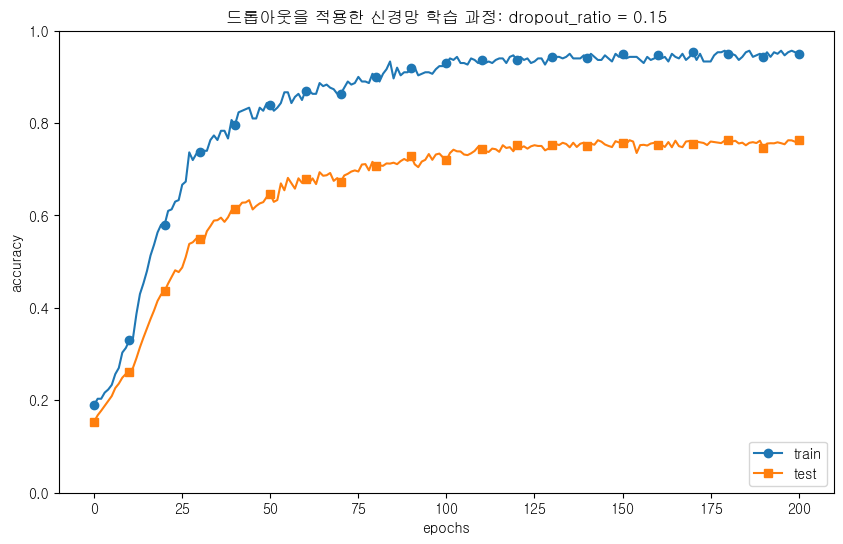

In [ ]:
# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.title('드롭아웃을 적용한 신경망 학습 과정: dropout_ratio = 0.15')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

# 5 하이퍼파라미터 튜닝

- lr: 학습률
- weight decay: L2 규제
<img src="./images/fig_6-24.png" width="500"/>

- Best-1 (val acc:0.83) | lr:0.0092, weight decay: 3.86e-07
- Best-2 (val acc:0.78) | lr:0.0095, weight decay: 6.04e-07

# 정리

- 매개변수 갱신 방법에는 확률적 경사 하강법(SGD) 외에도 모멘텀, AdaGrad, Adam 등이 있다.
- 가중치 초깃값을 정하는 방법은 올바른 학습을 히는 데 매우 중요하다.
- 가중치의 초깃값으로는 'Xavier 초깃값'과 'He 초깃값'이 효괴적이다.
- 배치 정규화를 이용하면 학습을 빠르게 진행할 수 있으며, 초기값에 영향을 덜 받게 된다.
- 오버피팅을 억제하는 정규화 기술로는 기중치 감소와 드롭아웃이 있다.
- 하이퍼따라미터 값 탐색은 최적 값이 존재할 법한 범위를 점차좁히면서 하는 것이 효과적이다.

---

# NOTE  

### Optimizer  
  
* SGD, Stochastic Gradient Descent ( Mini Batch is one of the SGD)

<img src="./images/e_6.1.png" width="180"/>

<img src="./images/fig_6-3.png" width="400"/>

사람이라면 초기 위치에서 중앙으로 바로 꽂았을텐데.. 지그재그로 쓸데 없이 많이 움직이며 최소점을 찾는다.  
이걸 해결하기 위해 Momentum을 만들었다.  

기존의 SGD 식에서는 dL/dW값이 각 포인트 별로 기울기가 반전되고 크기는 점차 작아지는 경향이 있다.  
그러니까 지그재그로 많이 움직이는 거다.  

<img src="./images/e_6.3.png" width="180"/>
<img src="./images/e_6.4.png" width="150"/>
  
* Momentum  

Momentum에서는 v를 거치게 해서 W값의 변화를 한 층 완화시켜준다.  
그래서 모멘텀(관성)이라고 부르는 거다.  
(동일 방향이면 그대로 유지, 부호 바뀌면 가던 방향으로의 관성이 작용해서 변화량을 완충시켜 부드럽게 이동시킴)  

<img src="./images/fig_6-5.png" width="400"/>
  
---

* Adaptive Gradient (AdaGrad)  

<img src="./images/e_6.5.png" width="180"/>
<img src="./images/e_6.6.png" width="180"/>

dL/dW 제곱을 계속해서 더하므로 h는 점점 커질 수밖에 없다.  
즉, W의 변화량을 의미하는데 역수로 들어가있으니.. W의 변화량은 학습이 진행될 수록 작아질 수밖에 없다.  

---  

### 가중치 초기값 설정법   

* Xavier, He  
  
기존에는 가중치의 초기값을 그냥 정규분포에서 랜덤하게 뽑았다.(ex. mean 0, std 1인 분포)  
이제 그러지 말고, Xavier (for Sigmoid, tanh)를 이용하여 mean 0, std 1/((n)^1/2)인 정규분포에서 랜덤하게 뽑거나,  
He (for ReLU)를 이용하여 mean 0,, std (2/n)^1/2인 정규분포에서 랜덤하게 뽑는다.  
(여기서 n은 해당 층의 node 수를 의미한다.)  

---  

### Batch Normalization  
  
1. 학습 속도 개선
2. 초기값 의존도 낮춤
3. 오버피팅 억제
  
배치를 추출하고 Layer에서 다음 Layer로 넘어가기 전에 정규화를 하고 넘긴다.  
다음 학습에서 사용될 배치를 추출하고 Layer에서 다음 Layer로 넘어가기 전에 정규화를 하고 넘긴다.  

첫 정규화와 그 다음 정규화는 다른 알고리즘이다.  
즉, 첫 배치에서 뽑힌 10이라는 데이터가 정규화되면 0.2가 되나, 두 번째 배치에서 똑같이 뽑힌 10은 정규화 되었을 때 0.7이 될수도 있다.  
동일한 원소인데 정규화 결과값이 다르다니! 이것은 머신러닝 때 배운 하나의 정규화 알고리즘을 사용해서 학습 데이터와 테스트 데이터에 적용시켜야 한다는 '그' 논리와 맞지 않는다.  
하지만.. 이렇게 하니까 성능이 좋더라~  

---  

### Overfitting 방지  
  
* Dropout  

<img src="./images/fig_6-22.png" width="500"/>

랜덤하게 노드를 몇 개 꺼가면서 학습시켜 칼날을 무디게 만들어 overfitting을 방지시킨다.  
일부러 모델을 살짝 멍청하게 학습시킨다는 의미이다.  

여러개의 트리를 사용해서 voting하는 tree와 비슷한 느낌이다.  

In [ ]:
# End of file